# 1. Import required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Load all analysis excels:

# BATCH B

In [8]:
# Combine batch B1 (already done)  211004IF_210921exp_DamMN

In [9]:
data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211004IF_210921exp_DamMN\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'doxPlusAID' not in _fd and 'H3K27ac' in _fd]


combined_df_b1 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop_H3K27_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_b1=  pd.concat([combined_df_b1,df])
   

In [10]:
combined_df_b1.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211004IF_210921exp_DamMN\measurement_for_all_well_background_subtracted_2_100_crop_Pol2_analyzed.xlsx", index=False)

In [6]:
# Combined batch B2 211007IF_210922exp_DamMN

sub_folders

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\well10_doxPlusAID_H3K27ac',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\well11_doxPlusAID_H3K27ac',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\well12_doxPlusAID_H3K27ac']

In [5]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211007IF_210922exp_DamMN\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'H3K27ac' in _fd]


combined_df_b2 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop_H3K27_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_b2=  pd.concat([combined_df_b2,df])
   

In [7]:
combined_df_b2.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211007IF_210922exp_DamMN\measurement_for_all_well_background_subtracted_2_100_crop_H3K27_analyzed.xlsx", index=False)

In [14]:
# Combined batch B3 211012IF_210927exp_DamMN

In [8]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211012IF_210927exp_DamMN\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'H3K27ac' in _fd]


combined_df_b3 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop_H3K27_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_b3=  pd.concat([combined_df_b3,df])
   

In [10]:
sub_folders 

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211012IF_210927exp_DamMN\\well8_doxPlusAID_H3K27ac',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211012IF_210927exp_DamMN\\well9_doxPlusAID_H3K27ac']

In [9]:
combined_df_b3.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211012IF_210927exp_DamMN\measurement_for_all_well_background_subtracted_2_100_crop_H3K27_analyzed.xlsx", index=False)

In [17]:
# Combine all dfs from all exp/batch B

In [11]:
combined_df=pd.DataFrame()

df_to_combine = [combined_df_b2,combined_df_b3]

for _df in df_to_combine:
    combined_df = pd.concat([combined_df,_df])

In [12]:
combined_df.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\measurement_for_all_batchB_background_subtracted_2_100_crop_H3K27_analyzed.xlsx", index=False)

# BATCH A

In [14]:
# load batch A1


# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchA\210225IF_210201exp_Dam\*"

sub_folders =[_fd for _fd in glob.glob(data_save_folder) if 'H3K27ac' in _fd]


combined_df_a1 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop_H3K27_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_a1=  pd.concat([combined_df_a1,df])

In [15]:
sub_folders 

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210225IF_210201exp_Dam\\well11_doxPlusAID_60x_H3K27ac']

In [17]:
# load batch A2


# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchA\210614IF_210525DamMNexp\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'H3K27ac' in _fd]


combined_df_a2 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop_H3K27_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_a2=  pd.concat([combined_df_a2,df])

In [18]:
sub_folders 

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210614IF_210525DamMNexp\\well7_DoxPlusAID_60x_H3K27ac']

In [19]:
combined_df_2=pd.DataFrame()

df_to_combine_2 = [combined_df_a1,combined_df_a2]

for _df in df_to_combine_2:
    combined_df_2 = pd.concat([combined_df_2,_df])

In [41]:
analysis_df.to_excel(r"D:\Analyzed_CellBio\Stam\measurement_for_all_batch_background_subtracted_2_100_crop_H3K27_analyzed.xlsx", index=False)

# 6. Post-hoc analysis examples

In [24]:
analysis_df=  pd.concat([combined_df,combined_df_2])

#analysis_df=analysis_df[analysis_df['normalized_inc_Pol2S5']<2]
len(analysis_df)

#len(combined_df)

143

In [25]:
# for total incorporated chr
analysis_df['normalized_inc_dna']=analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_inc_dna'].mean())

1.01144472239849


In [26]:
analysis_df['h2ax_damage_level']=analysis_df['area_h2ax_within_incorporated_chr']/analysis_df['area_incorporated_chr']

damaged_chr_df = analysis_df[analysis_df['h2ax_damage_level']>=0.5]

partial_damaged_chr_df = analysis_df[analysis_df['h2ax_damage_level']<0.5]

med_damaged_chr_df = partial_damaged_chr_df[partial_damaged_chr_df['h2ax_damage_level']>=0.2]

no_damaged_chr_df = partial_damaged_chr_df[partial_damaged_chr_df['h2ax_damage_level']<0.2]

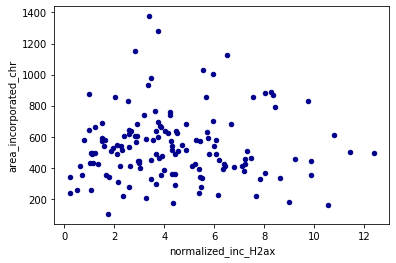

In [27]:
analysis_df['normalized_inc_H2ax'] = analysis_df['ave_intensity_incorporated_chr_H2ax']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H2ax']
#analysis_df


analysis_df.plot.scatter(x='normalized_inc_H2ax',y='area_incorporated_chr',c='DarkBlue')

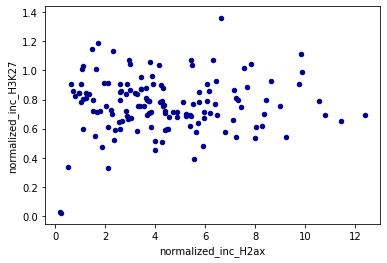

In [28]:
analysis_df.plot.scatter(x='normalized_inc_H2ax',y='normalized_inc_H3K27',c='DarkBlue')

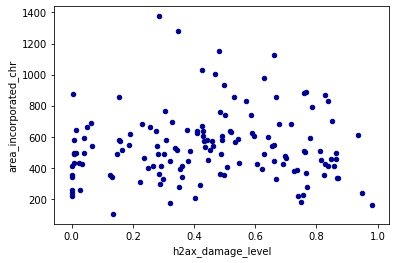

In [29]:
analysis_df.plot.scatter(x='h2ax_damage_level',y='area_incorporated_chr',c='DarkBlue')

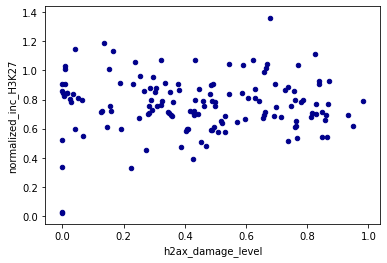

In [30]:
analysis_df.plot.scatter(x='h2ax_damage_level',y='normalized_inc_H3K27',c='DarkBlue')

In [31]:
print(damaged_chr_df['normalized_inc_H3K27'].mean())
print(damaged_chr_df['area_incorporated_chr'].mean())



print(med_damaged_chr_df['normalized_inc_H3K27'].mean())
print(med_damaged_chr_df['area_incorporated_chr'].mean())



print(no_damaged_chr_df['normalized_inc_H3K27'].mean())
print(no_damaged_chr_df['area_incorporated_chr'].mean())

0.7817485629308445
540.3793103448276
0.7492144151771564
566.1481481481482
0.763695158857414
480.61290322580646


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


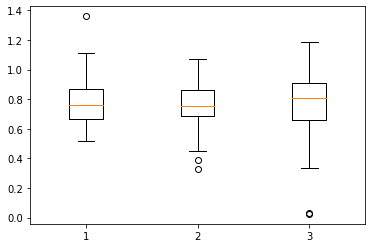

In [32]:
boxplot_pol2= plt.boxplot([damaged_chr_df['normalized_inc_H3K27'],med_damaged_chr_df['normalized_inc_H3K27'],no_damaged_chr_df['normalized_inc_H3K27']])

In [33]:
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(damaged_chr_df['normalized_inc_H3K27'], no_damaged_chr_df['normalized_inc_H3K27'])

U2, p2 = mannwhitneyu(damaged_chr_df['normalized_inc_H3K27'], med_damaged_chr_df['normalized_inc_H3K27'])

U3, p3 = mannwhitneyu(med_damaged_chr_df['normalized_inc_H3K27'], no_damaged_chr_df['normalized_inc_H3K27'])

from scipy.stats import kruskal
p4 = kruskal(damaged_chr_df['normalized_inc_H3K27'],med_damaged_chr_df['normalized_inc_H3K27'],no_damaged_chr_df['normalized_inc_H3K27'])


print(f"damgage vs no damage: {p1}")

print(f"damgage vs med damage: {p2}")

print(f"med damgage vs no damage: {p3}")

print(f"three samples comparision: {p4}")

damgage vs no damage: 0.26338673582561134
damgage vs med damage: 0.39552681034509185
med damgage vs no damage: 0.1416899793982429
three samples comparision: KruskalResult(statistic=0.9911145721305274, pvalue=0.6092312965628368)


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


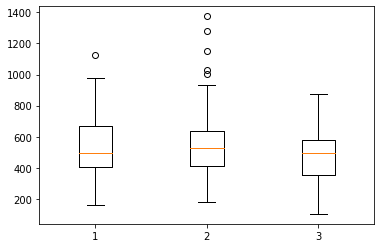

In [34]:
boxplot_size= plt.boxplot([damaged_chr_df['area_incorporated_chr'],med_damaged_chr_df['area_incorporated_chr'],no_damaged_chr_df['area_incorporated_chr']])

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


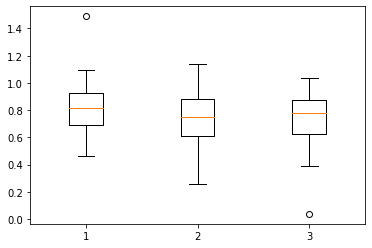

In [35]:
boxplot_size= plt.boxplot([damaged_chr_df['normalized_inc_H3K27']/damaged_chr_df['normalized_inc_dna'],
                           med_damaged_chr_df['normalized_inc_H3K27']/med_damaged_chr_df['normalized_inc_dna'],
                           no_damaged_chr_df['normalized_inc_H3K27']/no_damaged_chr_df['normalized_inc_dna']])

In [38]:
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(damaged_chr_df['normalized_inc_H3K27']/damaged_chr_df['normalized_inc_dna'], 
                      no_damaged_chr_df['normalized_inc_H3K27']/no_damaged_chr_df['normalized_inc_dna'])

U2, p2 = mannwhitneyu(med_damaged_chr_df['normalized_inc_H3K27']/med_damaged_chr_df['normalized_inc_dna'], 
                      no_damaged_chr_df['normalized_inc_H3K27']/no_damaged_chr_df['normalized_inc_dna'])

U3, p3 = mannwhitneyu(damaged_chr_df['normalized_inc_H3K27']/damaged_chr_df['normalized_inc_dna'], 
                      med_damaged_chr_df['normalized_inc_H3K27']/med_damaged_chr_df['normalized_inc_dna'])

from scipy.stats import kruskal

p4 = kruskal(damaged_chr_df['normalized_inc_H3K27']/damaged_chr_df['normalized_inc_dna'],
                           med_damaged_chr_df['normalized_inc_H3K27']/med_damaged_chr_df['normalized_inc_dna'],
                           no_damaged_chr_df['normalized_inc_H3K27']/no_damaged_chr_df['normalized_inc_dna'])


print(p1)

print(p2)

print(p3)

print(p4)

0.0861407803073963
0.4872541771838036
0.052435716288291766
KruskalResult(statistic=3.2434643368551406, pvalue=0.19755620192222548)


In [42]:
print(len(damaged_chr_df))

print(len(med_damaged_chr_df))

print(len(no_damaged_chr_df))



58
54
31


In [ ]:
#no_damaged_chr_df[no_damaged_chr_df['area_incorporated_chr']==151]